In [45]:
## PLot images for ale ma of data organized by experiment

In [46]:
%matplotlib inline
from nilearn import plotting
from nilearn import surface
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from os import listdir
from os.path import isfile, join
import nibabel as nib
from pathlib import Path

In [68]:
_nii_folder = r'../data_db/nifti-ale/by_exp/'
_nii_combos_folder = r'../data_db/nifti-ale/combos/by_exp/'
_img_folder_brain_flass = r'../data_db/nifti-ale/imgs/by_exp/brain_glass/'
_img_folder_stat_map = r'../data_db/nifti-ale/imgs/by_exp/stat_map/'
_img_folder_stat_map_manual = r'../data_db/nifti-ale/imgs/by_exp/stat_map/manual/'

## Import nifti images

In [19]:
nifti_files = {Path(f).stem: os.path.join(os.path.abspath(_nii_folder), f) for f in listdir(_nii_folder) if isfile(join(_nii_folder, f))}
nifti_combos_files = {Path(f).stem: os.path.join(os.path.abspath(_nii_combos_folder), f) for f in listdir(_nii_combos_folder) if isfile(join(_nii_combos_folder, f))}


## Load images

In [20]:
nifti_images = {k:nib.load(f) for k,f in nifti_files.items()}

# Plot for report
## Glass Brain for all points

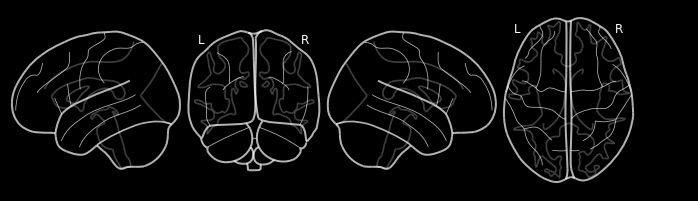

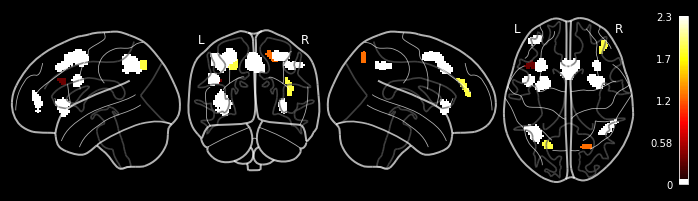

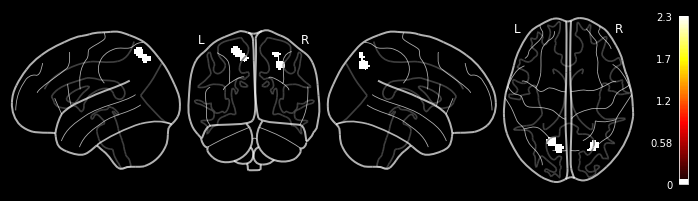

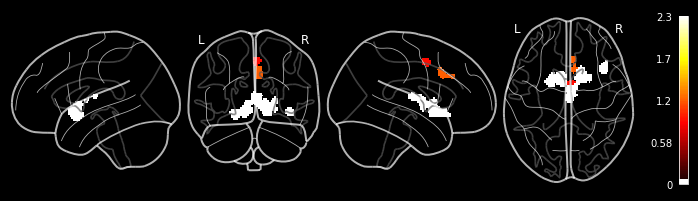

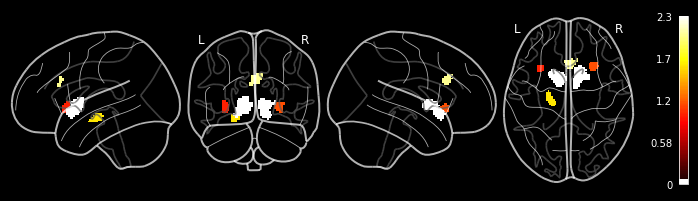

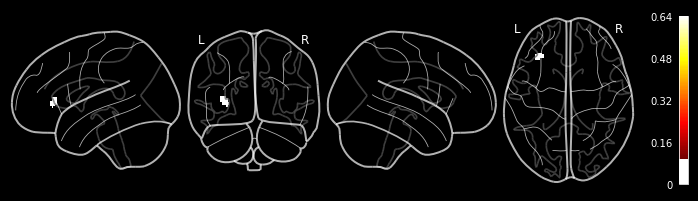

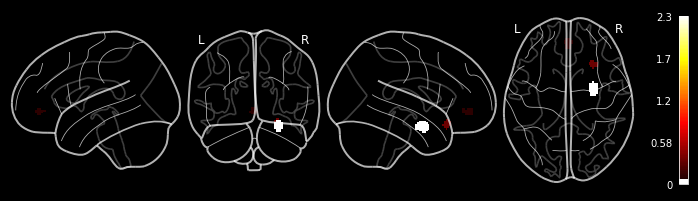

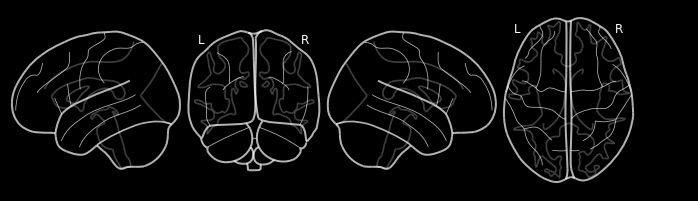

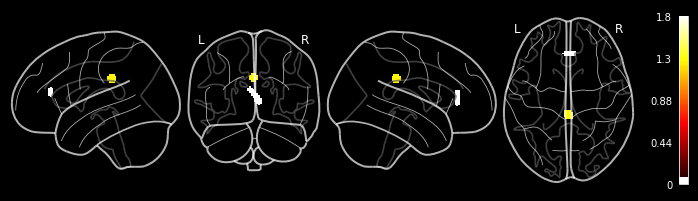

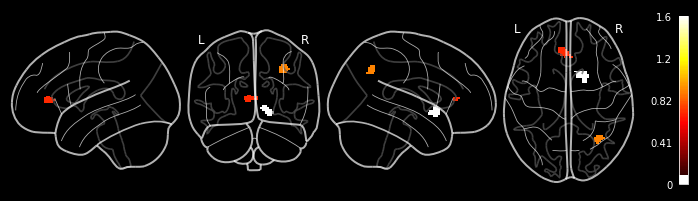

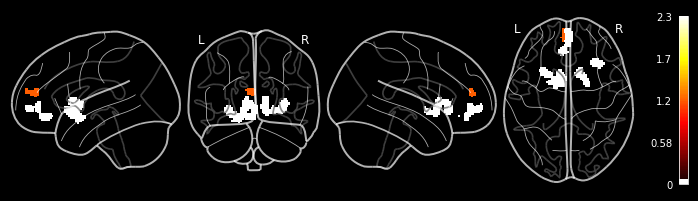

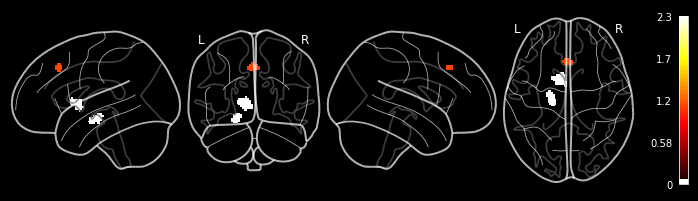

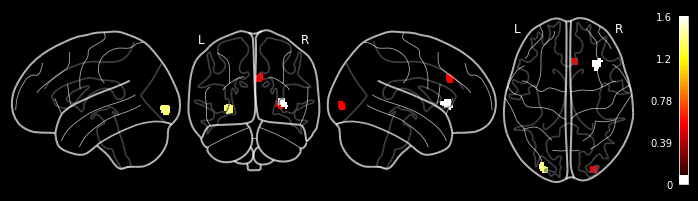

In [38]:
glass_images ={}
for key,val in nifti_images.items():
    glass_images[key] = plotting.plot_glass_brain(
        val, title='',colorbar=True,
        black_bg=True, display_mode='lyrz', threshold=0.1) #display_mode='ortho' #if there are not voxels in both hemispheres

### Save glass brain images

In [65]:
for key,img in glass_images.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_brain_flass), key+".png"),dpi=300)

In [ ]:
### Save manually
glass_images['select01_wm'].savefig("test.png",dpi=300)

## Sections

### Automatic

select00_test


C:\ProgramData\Anaconda3\envs\tfg-env\lib\site-packages\nilearn\plotting\displays\_slicers.py:383: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


select01_wm
select02_wm_decision-making
select03_reward_anticipation_rw-norw
select04_reward_anticipation_high_low_rew
select05_reward_anticipation_exp_recv_rew
select06_reward_outcome_rw-norw
select07_reward_outcome_risk-safe
select08_reward_outcome_high-low
select09_reward_outcome_win-lose
select10_reward_decision-making_outcome
select11_reward_decision-making_anticipation
select12_reward_decision-making_decision


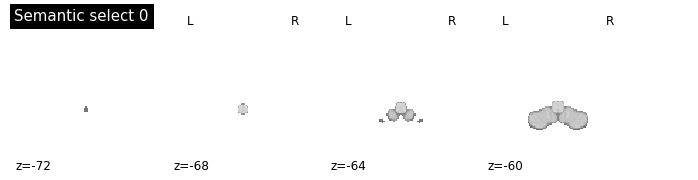

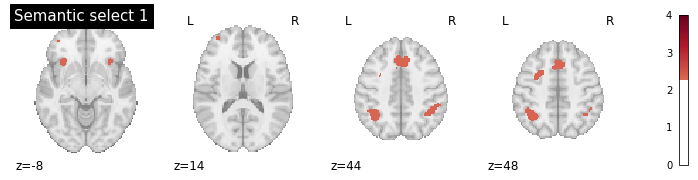

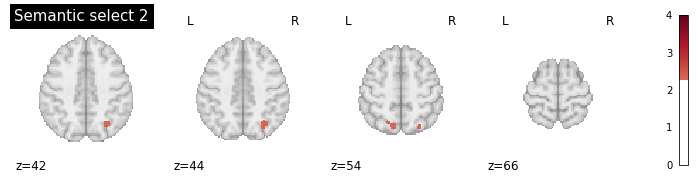

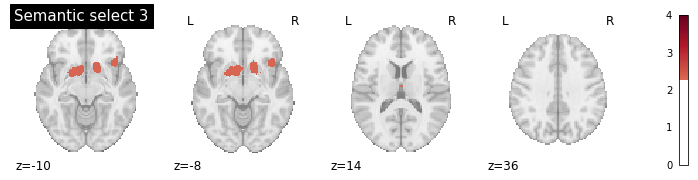

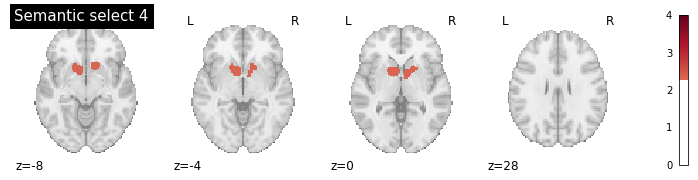

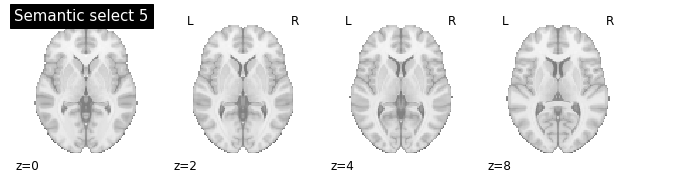

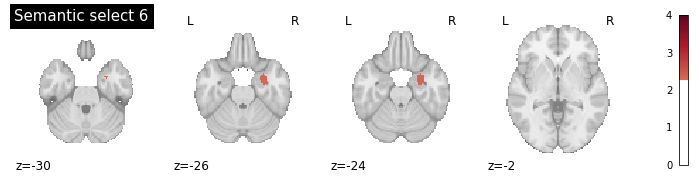

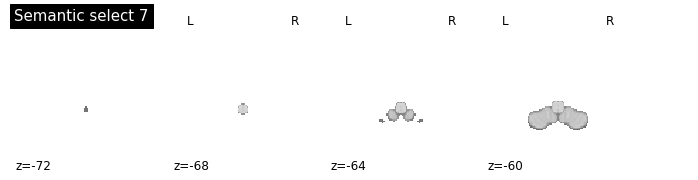

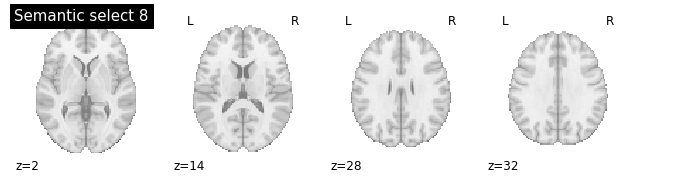

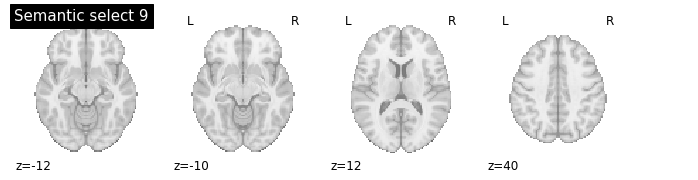

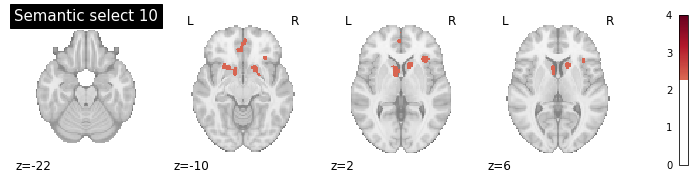

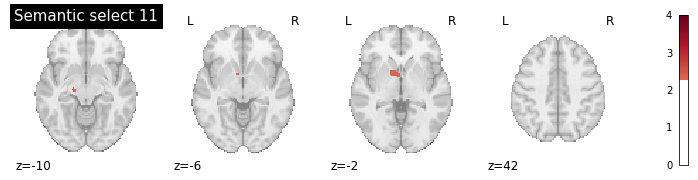

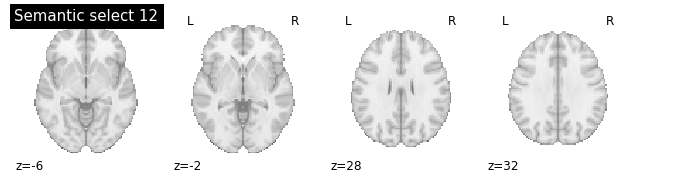

In [52]:
threshold = 0.01
stat_map={}
res_len = len(nifti_images)
# fig, axes = plt.subplots(figsize=(12, res_len * 10), nrows=res_len)
for index, (k, image) in tqdm(enumerate(nifti_images.items())):
    print(k)
    stat_map[k] = plot_stat_map(
        image,
        cut_coords=4,
        display_mode="z",
        title="Semantic select " + str(index),
        threshold=threshold,  #'auto' # cluster-level p < .01, one-tailed
        cmap="RdBu_r",
        vmax=4,
        # axes=axes[index],
        # figure=fig,
    )

#### Save Section image

In [64]:
for key,img in stat_map.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map), key+".png"),dpi=300)

### Sections - Automatic in COG

In [ ]:
lst = [(29, -66, 44),(-10, -69, 52),(-19, -61, 60)]
## Import the cog from csv

## do sections for all images in cog

### Manual

In [ ]:
list(nifti_images.keys())

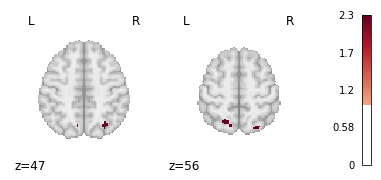

In [66]:
image = nifti_images['select02_wm_decision-making']
lst = [(28, -68, 47),(-15, -65, 56)]
stat_map_img = plot_stat_map(
    image,
    cut_coords=[47,56],#[28,-15],#[-68,-65],
    display_mode="z",
    # title=" ",
    threshold=0.95,  #'auto' # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    # vmax=4,
)


In [70]:
file_name = "select02_wm_decision-making.png"
stat_map_img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map_manual),file_name),dpi=300)